# Étude sur l'évolution de la concentration en CO2 dans l'atmosphère depuis 1954

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import isoweek
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Importation des données 
On utilisera les données fournies par Scripps CO2 program, en particulier celles du Mauna Loa Observatory, Hawaii.

Les données sont chargées depuis un dossier local grâce au code suivant (on note le lien utilisé en commentaire du code dans le cas où il serait nécessaire ou intéressant de mettre à jour le jeu de données):

In [33]:
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv"
data_csv = "\\lurs\_comptes\AB283490\personnel\documents\MOOC\co2.csv"

Les 43 premières lignes du fichier csv étant des commentraires, nous pouvons les exclures lors du chargement des données via pandas.

In [82]:
raw_data = pd.read_csv(data_csv, skiprows=44)
raw_data
list_raw = raw_data.columns.values
list_columns = ['date','concentration']
true_raw_data = []
for i in range(len(raw_data)):
    tertiary_list = []
    for j in range(len(list_raw)):
        tertiary_list.append(raw_data[list_raw[j]][i])
    true_raw_data.append(tertiary_list)
print(true_raw_data[0],type(true_raw_data[0][1]))
print(true_raw_data[0][1]-true_raw_data[4][1])
true_df = pd.DataFrame(true_raw_data, columns = list_columns)
true_df

['1958-04-05', 317.31] <class 'numpy.float64'>
0.36000000000001364


date  concentration
0     1958-04-05         317.31
1     1958-04-12         317.69
2     1958-04-19         317.58
3     1958-04-26         316.48
4     1958-05-03         316.95
5     1958-05-17         317.56
6     1958-05-24         317.99
7     1958-07-05         315.85
8     1958-07-12         315.85
9     1958-07-19         315.46
10    1958-07-26         315.59
11    1958-08-02         315.64
12    1958-08-09         315.10
13    1958-08-16         315.09
14    1958-08-30         314.14
15    1958-09-06         313.54
16    1958-11-08         313.05
17    1958-11-15         313.26
18    1958-11-22         313.57
19    1958-11-29         314.01
20    1958-12-06         314.56
21    1958-12-13         314.41
22    1958-12-20         314.77
23    1958-12-27         315.21
24    1959-01-03         315.24
25    1959-01-10         315.50
26    1959-01-17         315.69
27    1959-01-24         315.86
28    1959-01-31         315.42
29    1959-02-14         316.94
...          ...            ...
3386  2024-07-27         424.72
3387  2024-08-03         424.42
3388  2024-08-10         422.50
3389  2024-08-17         422.80
3390  2024-08-24         421.45
3391  2024-08-31         421.57
3392  2024-09-07         421.81
3393  2024-09-14         421.39
3394  2024-09-21         421.77
3395  2024-09-28         421.51
3396  2024-10-05         421.86
3397  2024-10-12         422.13
3398  2024-10-19         422.16
3399  2024-10-26         422.36
3400  2024-11-02         423.15
3401  2024-11-09         423.18
3402  2024-11-16         423.51
3403  2024-11-23         424.03
3404  2024-11-30         424.44
3405  2024-12-07         424.93
3406  2024-12-14         424.79
3407  2024-12-21         425.35
3408  2024-12-28         425.57
3409  2025-01-04         425.93
3410  2025-01-11         426.35
3411  2025-01-18         426.56
3412  2025-02-01         426.28
3413  2025-02-08         427.11
3414  2025-02-15         426.94
3415  2025-02-22         427.29

[3416 rows x 2 columns]

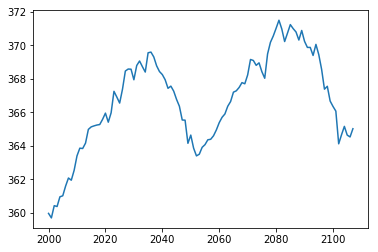

In [95]:
plt.figure()
plt.plot(true_df['concentration'][2000:2108])
plt.show()

Ce zoom sur les premières valeurs nous permet d'estimer la période associée à l'effet oscillatoire.
De ce fait nous pouvons considérer que l'effet oscillatoire a à peu près toujours les mêmes valeurs
que celles observées lors des premières périodes. On a donc fait le choix de crée un second DataFrame en prenant les valeurs du premier et en soustrayant les valeurs correspondant à l'effet oscillatoire. Cette méthode devrait pouvoir nous donner une valeur correcte de l'effet progressif.

On observe une période de l'effet oscillatoire d'environ 52 semaines soit un an.

On prendra la seconde année comme valeur de référence.

In [96]:
revised_data = []
for i in range(len(true_raw_data)):
    revised_data.append([true_raw_data[i][0],true_raw_data[i][1]-true_raw_data[i%52+58][1]])
revised_df = pd.DataFrame(revised_data, columns = list_columns)
revised_df

date  concentration
0     1958-04-05           3.77
1     1958-04-12           4.65
2     1958-04-19           4.43
3     1958-04-26           3.05
4     1958-05-03           3.49
5     1958-05-17           3.44
6     1958-05-24           3.57
7     1958-07-05           0.97
8     1958-07-12           0.65
9     1958-07-19           0.35
10    1958-07-26           0.53
11    1958-08-02           0.00
12    1958-08-09          -0.76
13    1958-08-16          -0.68
14    1958-08-30          -1.58
15    1958-09-06          -2.86
16    1958-11-08          -3.68
17    1958-11-15          -3.31
18    1958-11-22          -3.11
19    1958-11-29          -2.60
20    1958-12-06          -2.42
21    1958-12-13          -3.01
22    1958-12-20          -2.23
23    1958-12-27          -1.75
24    1959-01-03          -2.52
25    1959-01-10          -2.57
26    1959-01-17          -2.08
27    1959-01-24          -2.75
28    1959-01-31          -3.92
29    1959-02-14          -2.07
...          ...            ...
3386  2024-07-27         110.30
3387  2024-08-03         109.54
3388  2024-08-10         107.30
3389  2024-08-17         107.69
3390  2024-08-24         106.39
3391  2024-08-31         105.93
3392  2024-09-07         105.95
3393  2024-09-14         105.62
3394  2024-09-21         106.05
3395  2024-09-28         105.11
3396  2024-10-05         105.13
3397  2024-10-12         105.56
3398  2024-10-19         105.48
3399  2024-10-26         105.75
3400  2024-11-02         106.17
3401  2024-11-09         105.76
3402  2024-11-16         106.51
3403  2024-11-23         107.07
3404  2024-11-30         106.68
3405  2024-12-07         106.86
3406  2024-12-14         107.02
3407  2024-12-21         106.74
3408  2024-12-28         106.23
3409  2025-01-04         106.92
3410  2025-01-11         107.32
3411  2025-01-18         106.79
3412  2025-02-01         106.32
3413  2025-02-08         107.29
3414  2025-02-15         106.90
3415  2025-02-22         107.23

[3416 rows x 2 columns]

On peut maintenant représenter sur un graphique la courbe révisée de concentration en CO2 dans l'air. Ce qu'on obtient n'est qu'une approximation
grossière de l'allure de la concentration au cours du temps en ne tennant pas compte des effets oscillatoires.

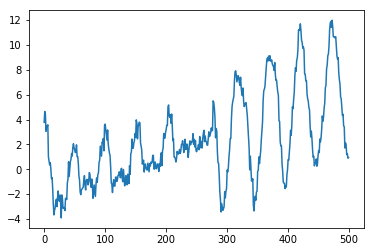

In [92]:
plt.figure()
plt.plot(revised_df['concentration'][:500])
plt.show()

On remarque que cette méthode ne donne pas de résultats concluants. On se propose donc de faire une moyenne de la concentration
sur chaque année et d'afficher cette valeur moyenne au lieu de tenter de supprimer l'effet périodique.

In [102]:
mean_values = []
for i in range(len(true_df)//52):
    M=0
    for j in range(52):
        M += true_df['concentration'][i*52+j]
    mean_values.append(M/52)
mean_values
print(len(mean_values))
print(mean_values[0], mean_values[30],mean_values[64], mean_values[17])

65
316.29519230769233 353.10076923076934 422.42807692307684 332.3986538461538


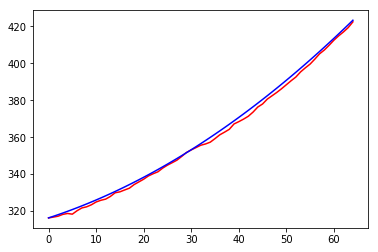

In [115]:
plt.figure()
plt.plot(mean_values, 'r')
approx = []
diff = []
a=0.013
b=0.84
c=316.3
for i in range(len(mean_values)):
    approx.append(0.013*i**2+0.84*i+316.3)
    diff.append((approx[i]-mean_values[i])/mean_values[i])
plt.plot(approx, 'b')
#plt.plot(diff, 'g')

On remarque qu'il s'agit probablement d'une fonction parabolique. On cherche donc à estimer les valeurs de a,b et c dans la formule $f(x)\:=\:ax^{2}+bx+c$. On peut déjà voir que $b\:=\:f(0)$. Après calcul on obtient que si on prend trois valeurs $x_{1},\:x_{2},\:x_{3}$ on a $a\:=\:\frac{\frac{f(x_{2})-f(x_{1})}{x_{2}-x_{1}}-\frac{f(x_{2})-f(x_{3})}{x_{2}-x_{3}}}{x_{1}-x_{3}}$. Finalement on peut déterminer b : $b\:=\:\frac{f(x)-ax^{2}-c}{x}$

En utilisant les données mises à notre disposition, on peut extrapoler un modèle parabolique avec les valeurs suivantes : $a\:=\:0.013,\: b\:=\:0.84,\: c\:=\: 316.3$

On peut comparer notre modèle théorique et les valeurs réelles avec oscillations pour voir si on a bien une représentation
cohérente de la tendance :

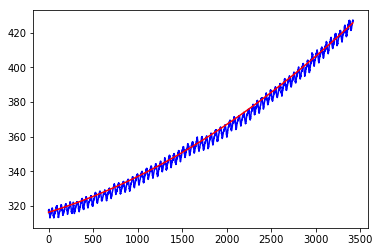

In [117]:
plt.plot(true_df['concentration'],'b')
new_approx = []
for i in range(len(true_df['concentration'])):
    x=i*65/len(true_df['concentration'])
    new_approx.append(a*x**2+b*x+c)

plt.plot(new_approx, 'r')